In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
df.head(1)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [219]:
# Missing Values
df.isna().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

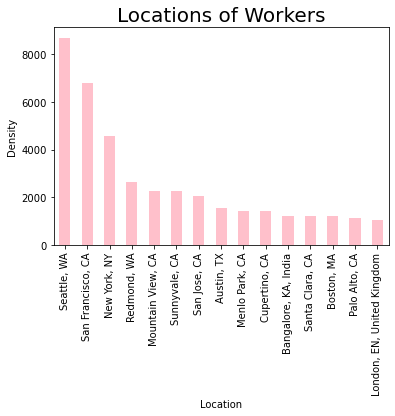

In [220]:
df['location'].value_counts().iloc[:15].plot(kind = 'bar', color = 'pink')
plt.title('Locations of Workers', size = 20)
plt.xlabel('Location')
plt.ylabel('Density')
plt.show()

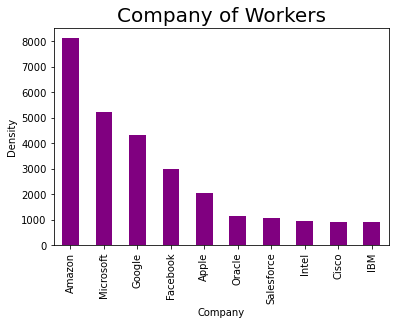

In [221]:
df['company'].value_counts().iloc[:10].plot(kind = 'bar', color = 'purple')
plt.title('Company of Workers', size = 20)
plt.xlabel('Company')
plt.ylabel('Density')
plt.show()

In [222]:
df['gender'].unique()

array([nan, 'Male', 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

In [223]:
# There is no 'Title: Senior software Engineer' gender, so we need to remove this.
df['gender'].replace('Title: Senior Software Engineer', np.nan, inplace = True)

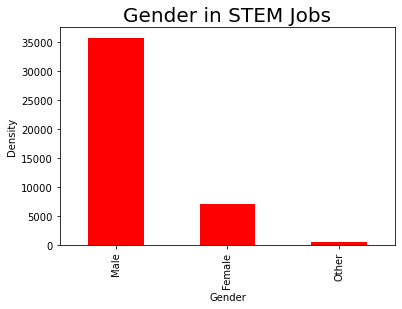

In [224]:
df['gender'].value_counts().plot(kind = 'bar', color = 'red')
plt.title('Gender in STEM Jobs', size = 20)
plt.xlabel('Gender')
plt.ylabel('Density')
plt.show()

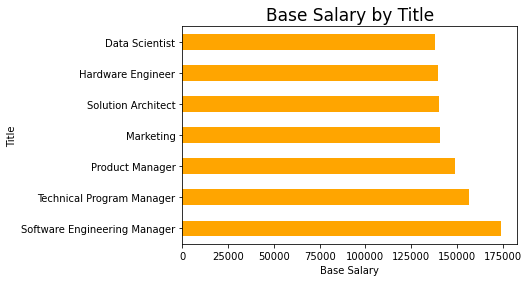

In [225]:
tgroup = df.groupby(['title']).mean()
tgroup.sort_values(by = 'basesalary', ascending = False).head(7)['basesalary'].plot(kind = 'barh', color = 'orange')
plt.title('Base Salary by Title', size = 17)
plt.xlabel('Base Salary')
plt.ylabel('Title')
plt.show()

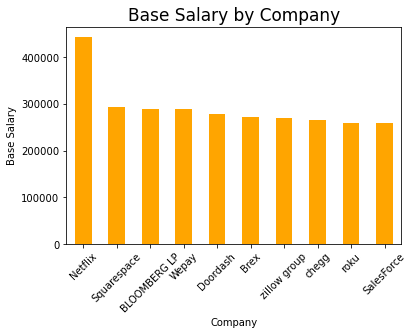

In [226]:
cgroup = df.groupby(['company']).mean()
cgroup.sort_values(by = 'basesalary', ascending = False).head(10)['basesalary'].plot(kind = 'bar', color = 'orange')
plt.title('Base Salary by Company', size = 17)
plt.xlabel('Company')
plt.ylabel('Base Salary')
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:xlabel='Race', ylabel='basesalary'>

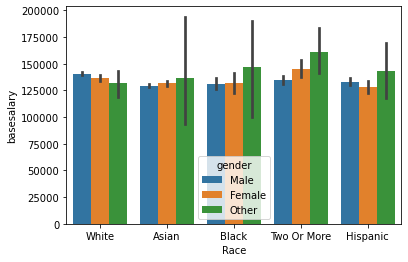

In [227]:
sns.barplot(x = 'Race', hue = 'gender', y = 'basesalary', data = df)

<AxesSubplot:xlabel='basesalary', ylabel='title'>

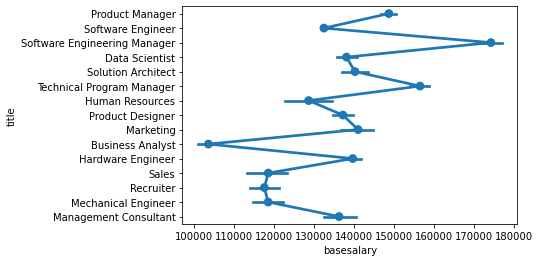

In [228]:
sns.pointplot(data = df, y = 'title', x = 'basesalary')

/Users/Soojin_1/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


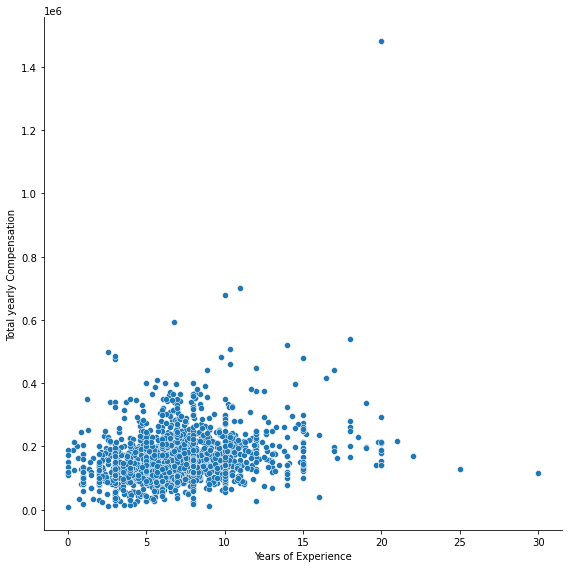

In [229]:
sns.pairplot(cgroup, x_vars = ['yearsofexperience'] , y_vars = ['totalyearlycompensation'], size = 8, kind = 'scatter')
plt.xlabel('Years of Experience')
plt.ylabel('Total yearly Compensation')
plt.show()

In [231]:
df['title'].unique()

array(['Product Manager', 'Software Engineer',
       'Software Engineering Manager', 'Data Scientist',
       'Solution Architect', 'Technical Program Manager',
       'Human Resources', 'Product Designer', 'Marketing',
       'Business Analyst', 'Hardware Engineer', 'Sales', 'Recruiter',
       'Mechanical Engineer', 'Management Consultant'], dtype=object)

In [232]:
F = df[df.gender == 'Female']

In [233]:
#FEMALE data subset by Title
F_SWE = F[F.title == 'Software Engineer']
F_TPM = F[F.title == 'Technical Program Manager']
F_PM = F[F.title == 'Product Manager']
F_Mar = F[F.title == 'Marketing']
F_SA = F[F.title == 'Solution Architect']
F_HWE = F[F.title == 'Hardware Engineer']
F_DS = F[F.title == 'Data Scientist']

In [234]:
F_SWE_Mean = F_SWE.groupby(['title', 'company', 'gender'], as_index = False).mean()
F_TPM_Mean = F_TPM.groupby(['title', 'company', 'gender'], as_index = False).mean()
F_PM_Mean = F_TPM.groupby(['title', 'company', 'gender'], as_index = False).mean()
F_Mar_Mean = F_Mar.groupby(['title', 'company', 'gender'], as_index = False).mean()
F_SA_Mean = F_SA.groupby(['title', 'company', 'gender'], as_index = False).mean()
F_HWE_Mean = F_HWE.groupby(['title', 'company', 'gender'], as_index = False).mean()
F_DS_Mean = F_DS.groupby(['title', 'company', 'gender'], as_index = False).mean()

In [235]:
M = df[df.gender == 'Male']

In [236]:
#MALE data subset by Title
M_SWE = M[M.title == 'Software Engineer']
M_TPM = M[M.title == 'Technical Program Manager']
M_PM = M[M.title == 'Product Manager']
M_Mar = M[M.title == 'Marketing']
M_SA = M[M.title == 'Solution Architect']
M_HWE = M[M.title == 'Hardware Engineer']
M_DS = M[M.title == 'Data Scientist']

In [237]:
M_SWE_Mean = M_SWE.groupby(['title', 'company', 'gender'], as_index = False).mean()
M_TPM_Mean = M_TPM.groupby(['title', 'company', 'gender'], as_index = False).mean()
M_PM_Mean = M_TPM.groupby(['title', 'company', 'gender'], as_index = False).mean()
M_Mar_Mean = M_Mar.groupby(['title', 'company', 'gender'], as_index = False).mean()
M_SA_Mean = M_SA.groupby(['title', 'company', 'gender'], as_index = False).mean()
M_HWE_Mean = M_HWE.groupby(['title', 'company', 'gender'], as_index = False).mean()
M_DS_Mean = M_DS.groupby(['title', 'company', 'gender'], as_index = False).mean()

In [238]:
F_mean_frames = F_SWE_Mean.append([F_TPM_Mean, F_PM_Mean, F_Mar_Mean, F_SA_Mean, F_HWE_Mean, F_DS_Mean])
M_mean_frames = M_SWE_Mean.append([M_TPM_Mean, M_PM_Mean, M_Mar_Mean, M_SA_Mean, M_HWE_Mean, M_DS_Mean])

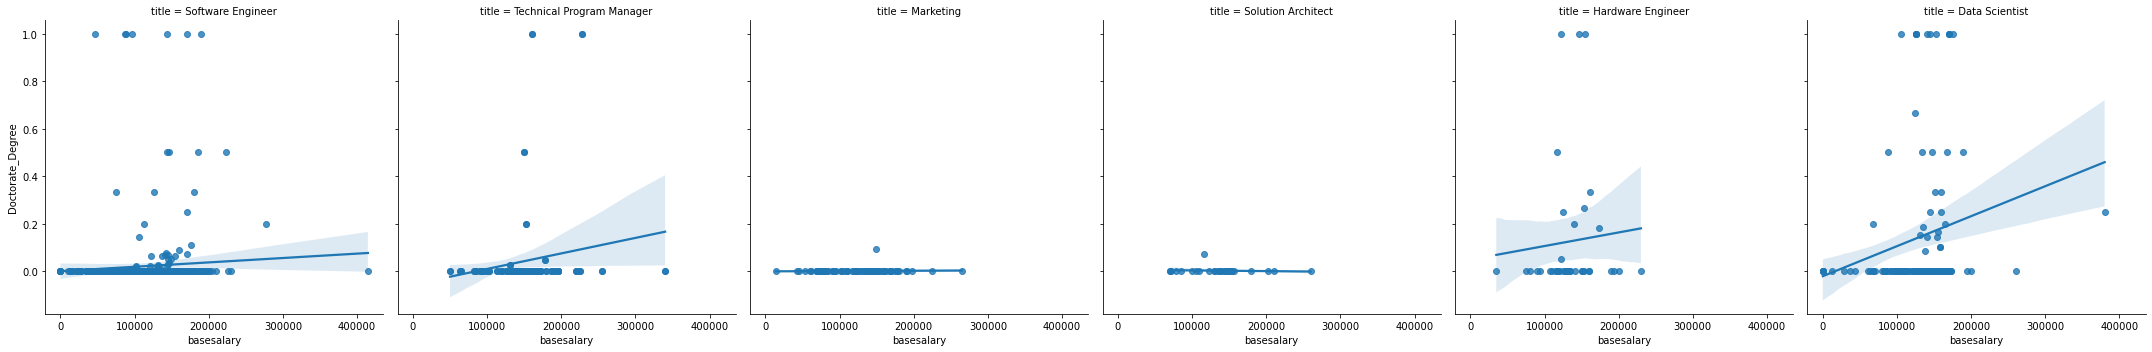

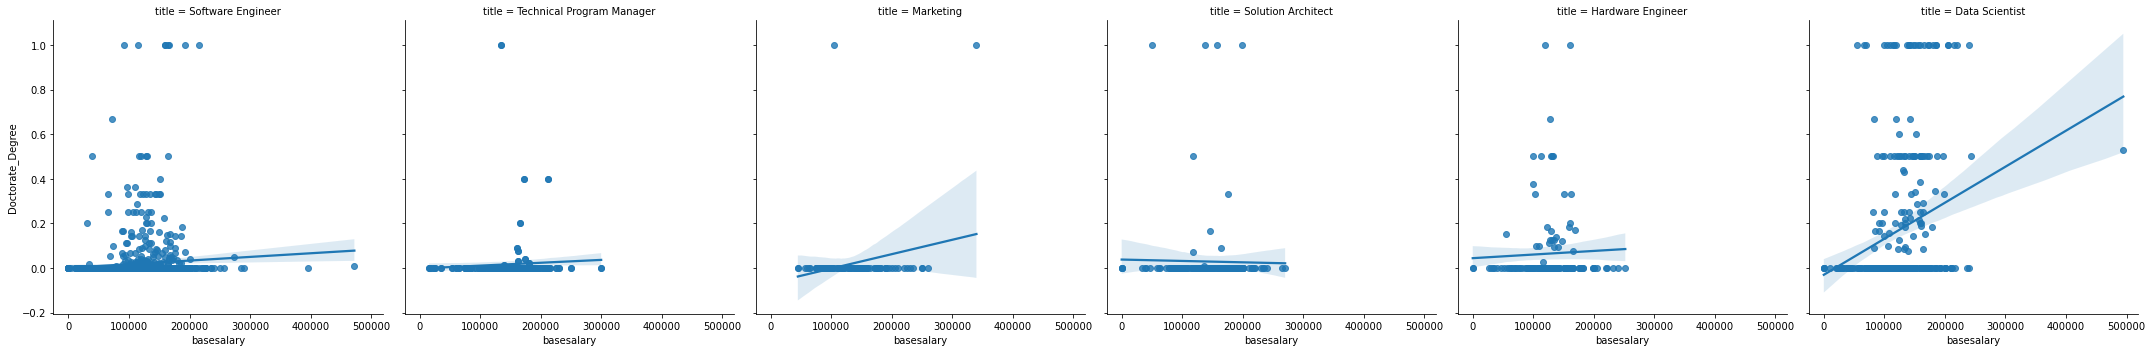

In [239]:
sns.lmplot(x = 'basesalary', y = 'Doctorate_Degree', 
           data = F_mean_frames, col = 'title')
plt.show()

sns.lmplot(x = 'basesalary', y = 'Doctorate_Degree', 
           data = M_mean_frames, col = 'title')
plt.show()

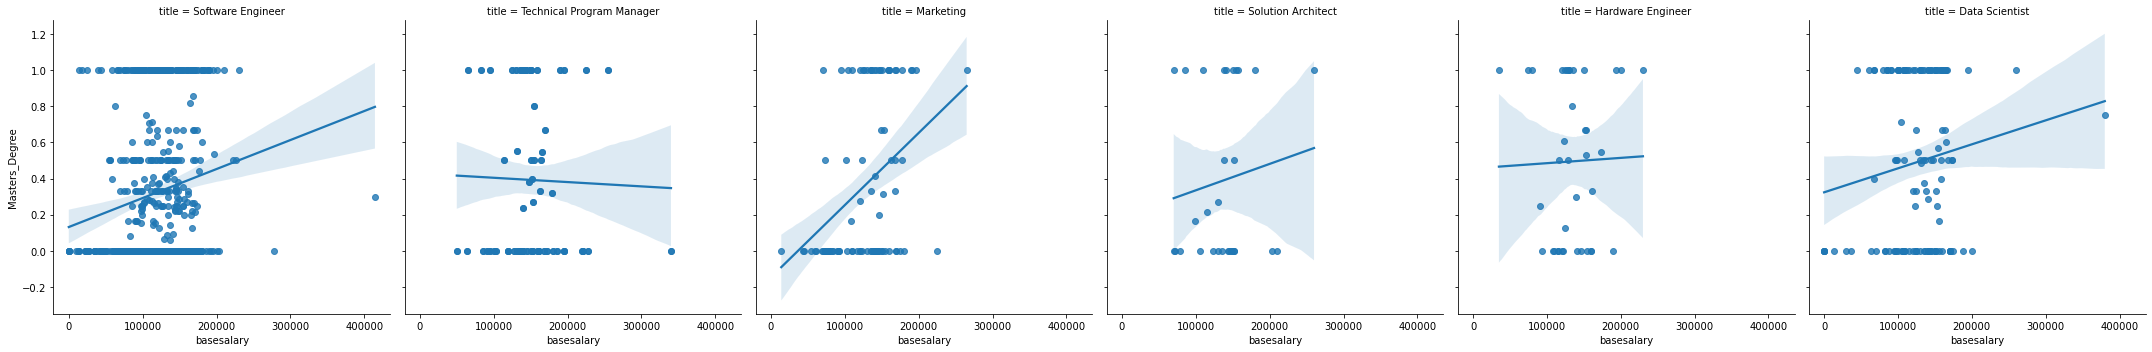

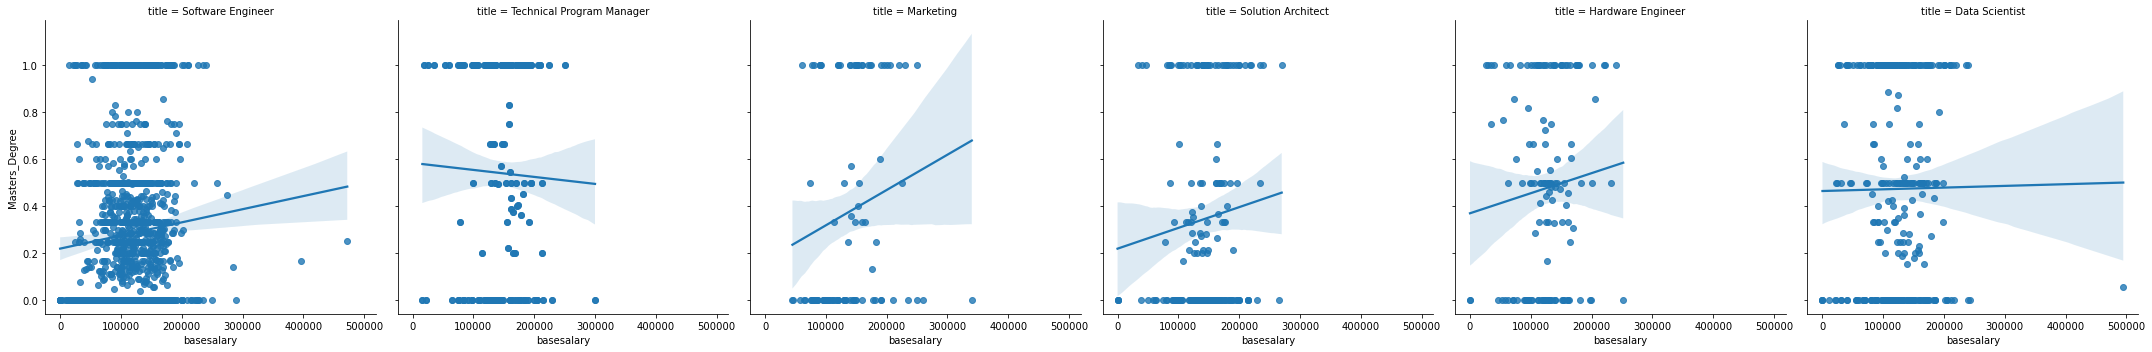

In [240]:
sns.lmplot(x = 'basesalary', y = 'Masters_Degree', 
           data = F_mean_frames, col = 'title')
plt.show()

sns.lmplot(x = 'basesalary', y = 'Masters_Degree', 
           data = M_mean_frames, col = 'title')
plt.show()

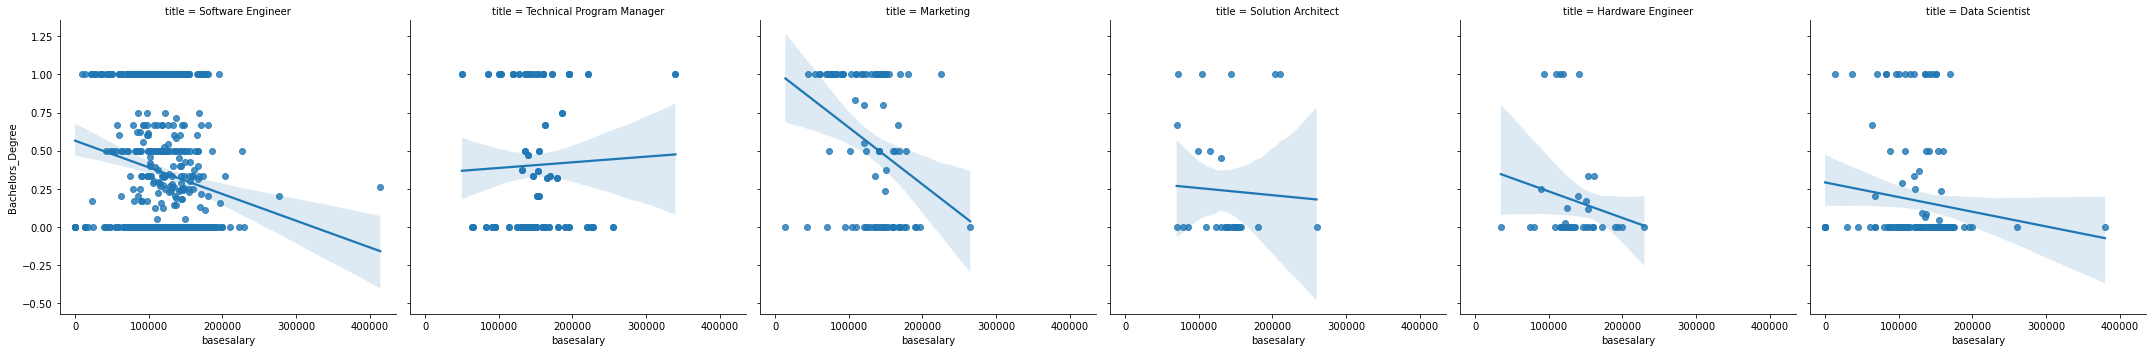

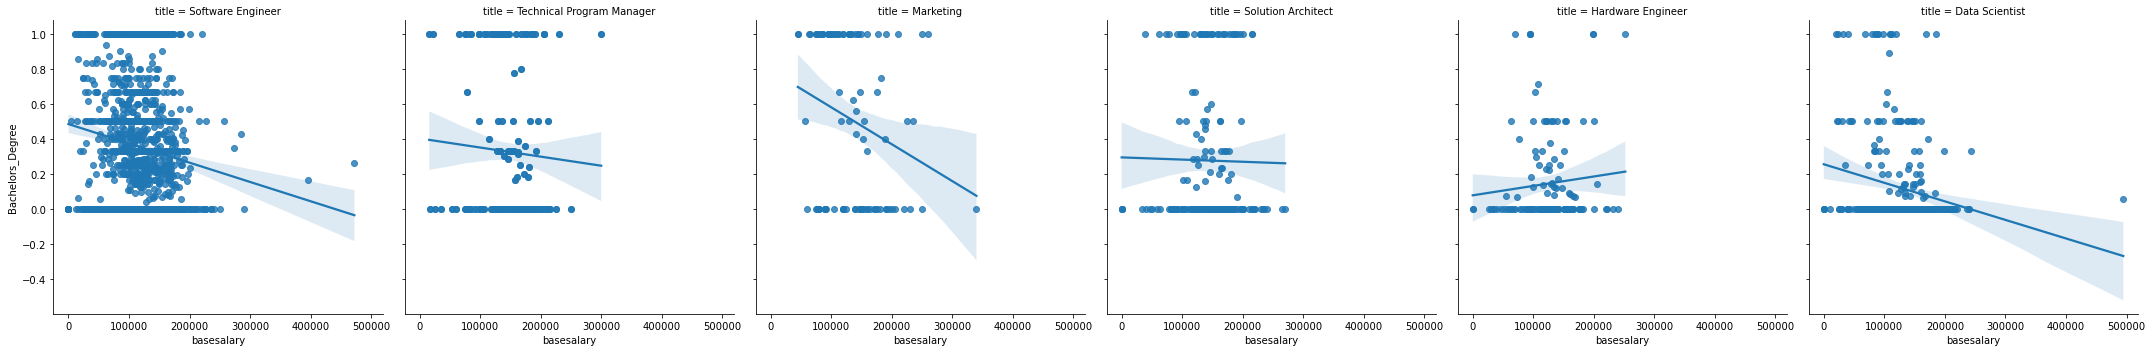

In [241]:
sns.lmplot(x = 'basesalary', y = 'Bachelors_Degree', 
           data = F_mean_frames, col = 'title')
plt.show()

sns.lmplot(x = 'basesalary', y = 'Bachelors_Degree', 
           data = M_mean_frames, col = 'title')
plt.show()

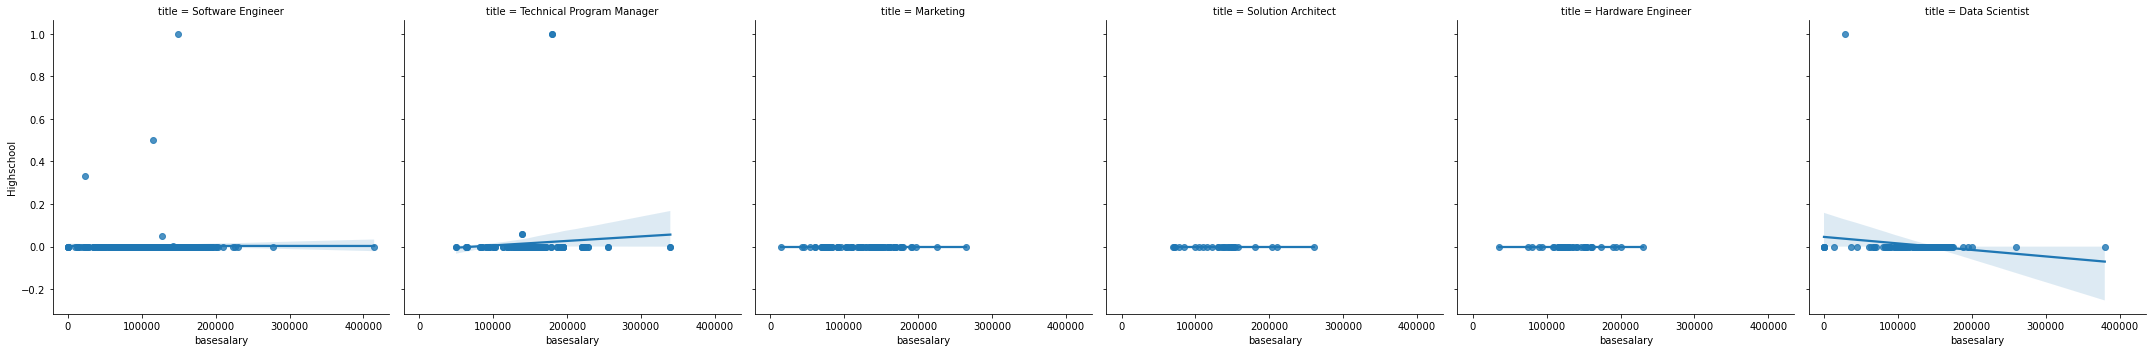

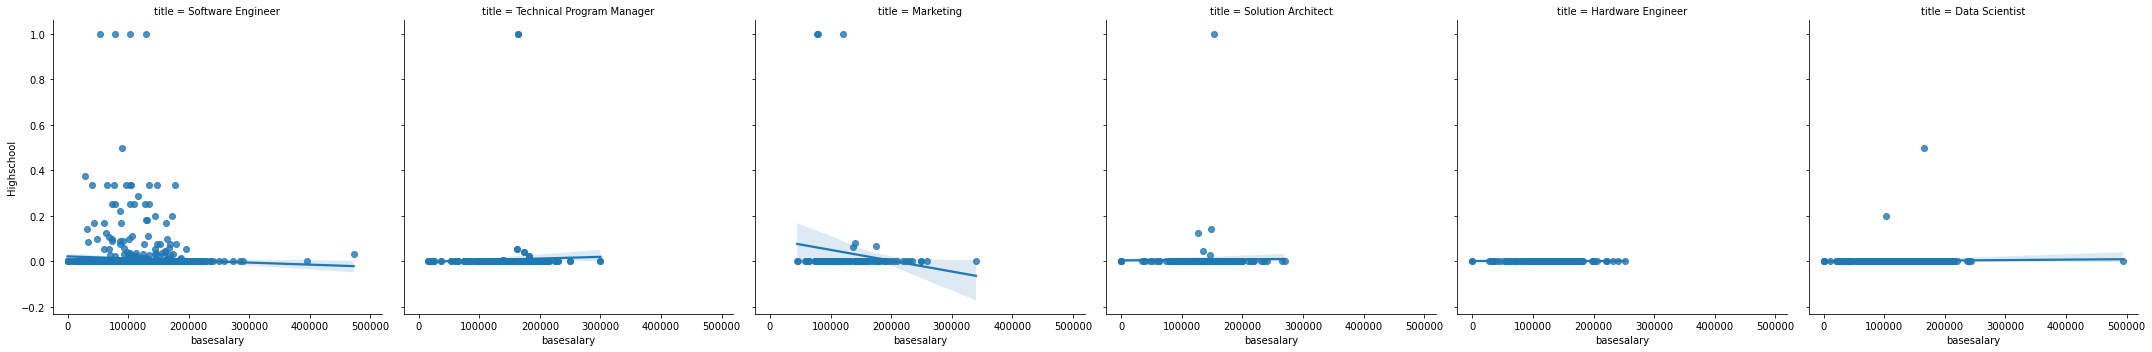

In [242]:
sns.lmplot(x = 'basesalary', y = 'Highschool', 
           data = F_mean_frames, col = 'title')
plt.show()

sns.lmplot(x = 'basesalary', y = 'Highschool', 
           data = M_mean_frames, col = 'title')
plt.show()

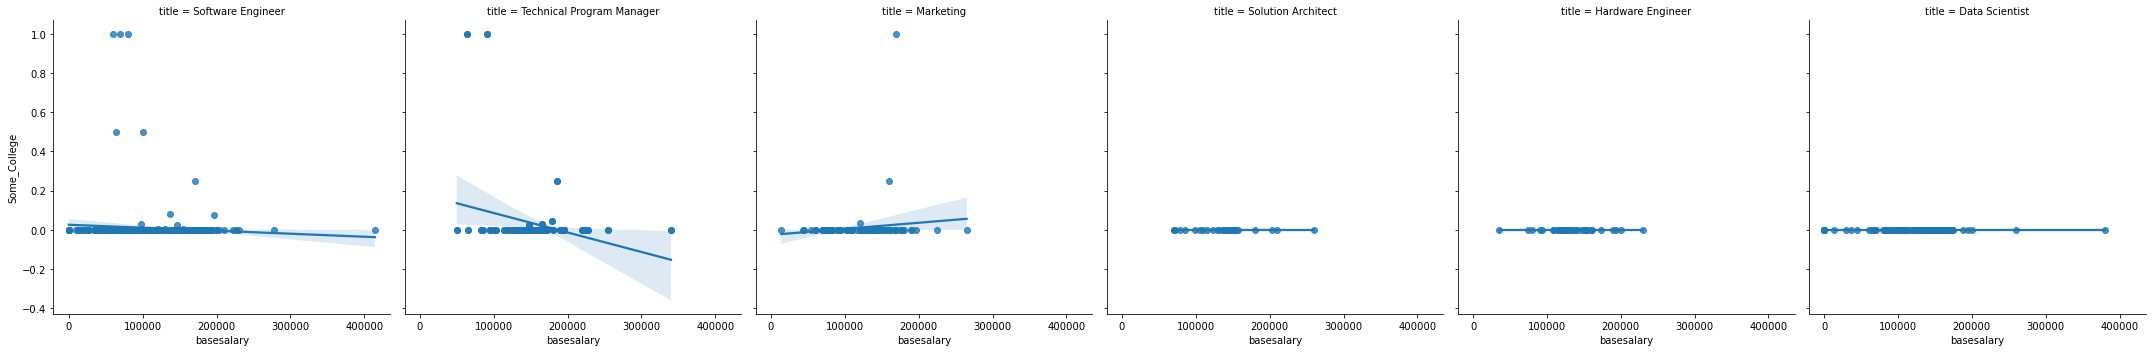

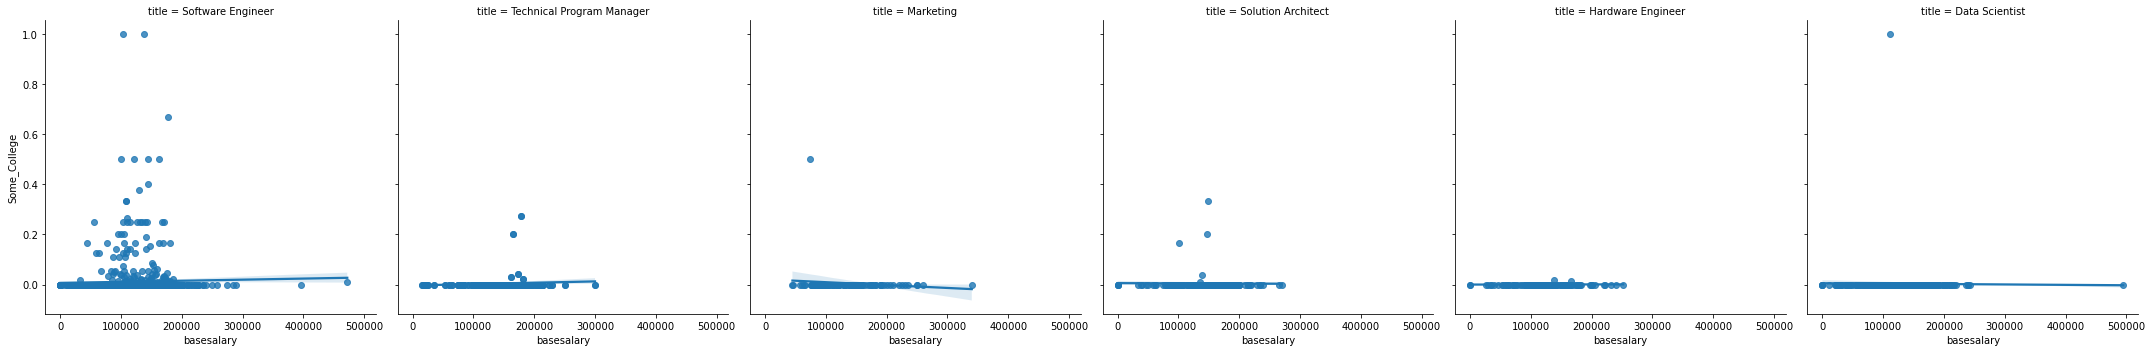

In [243]:
sns.lmplot(x = 'basesalary', y = 'Some_College', 
           data = F_mean_frames, col = 'title')
plt.show()

sns.lmplot(x = 'basesalary', y = 'Some_College', 
           data = M_mean_frames, col = 'title')
plt.show()

In [244]:
df.median()

/var/folders/jq/614zszld1kjgm0b9sz7z6xr80000gn/T/ipykernel_11931/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


totalyearlycompensation    188000.0
yearsofexperience               6.0
yearsatcompany                  2.0
basesalary                 140000.0
stockgrantvalue             25000.0
bonus                       14000.0
cityid                       7839.0
dmaid                         807.0
rowNumber                   42019.0
Masters_Degree                  0.0
Bachelors_Degree                0.0
Doctorate_Degree                0.0
Highschool                      0.0
Some_College                    0.0
Race_Asian                      0.0
Race_White                      0.0
Race_Two_Or_More                0.0
Race_Black                      0.0
Race_Hispanic                   0.0
dtype: float64

In [245]:
df_level = df.groupby('level')['basesalary'].median().reset_index()
df_level

,level,basesalary
0,-,95000.0
1,0,131000.0
2,004,79000.0
3,005,100000.0
4,006,133000.0
...,...,...
2918,zen2,70000.0
2919,||,102000.0
2920,Руководитель Направления,75000.0
2921,Сontractor,73000.0


In [246]:
df_level.columns = ['level', 'avgerage_salary']
df = df.merge(df_level)
df_cmp_comp = df.groupby('company')['basesalary'].median().reset_index()
df_cmp_comp

,company,basesalary
0,10x Genomics,150000.0
1,23andMe,120000.0
2,2U,140000.0
3,3M,101000.0
4,3m,98000.0
...,...,...
1623,zoom,0.0
1624,zoominfo,145000.0
1625,zoox,170000.0
1626,zynga,200000.0


In [247]:
# median of base salary by race
data_racesalmed = df.groupby(['Race'], as_index=False)['basesalary'].median()
data_racesalmed.head()

,Race,basesalary
0,Asian,135000.0
1,Black,124000.0
2,Hispanic,130000.0
3,Two Or More,134000.0
4,White,138000.0


In [248]:
bootstrap = pd.DataFrame({'df': [df.sample(100, replace = True).basesalary.median() for i in range (1000)]})
bootstrap.head()

,df
0,140000.0
1,140500.0
2,137500.0
3,130000.0
4,147000.0


In [249]:
bootstrap.median()

df    140000.0
dtype: float64

In [251]:
df.basesalary.median()

140000.0

In [252]:
# Median Bootstrapping 2 - Sample 1000
bootstrap2 = pd.DataFrame({'df': [df.sample(1000, replace = True).basesalary.median() for i in range (1000)]})
bootstrap2.median()

df    140000.0
dtype: float64

In [253]:
# Median Bootstrapping 3 - Sample 5000
bootstrap3 = pd.DataFrame({'df': [df.sample(5000, replace = True).basesalary.median() for i in range (5000)]})
bootstrap3.median()

df    140000.0
dtype: float64

In [254]:
# Median Bootstrapping 3 - Sample 10%: 6264.2
bootstrap_10pct = pd.DataFrame({'df': [df.sample(6264, replace = True).basesalary.median() for i in range (5000)]})
bootstrap_10pct.median()

df    140000.0
dtype: float64